* Get the summary of the dataset
* Missing values handling
* Duplicate value handling
* Data distribution
* Outlier handling
    * Replace the outliers using median values
    * Remove outliers
    * Do not change outliers
* Correlation analysis
* Class balancing using SMOTE algorithm
* Feature Scaling
    * Standardization
    * Normalization
* Modeling
    * Logistic Regression Model
    * Naive Bayes
    * Neural Network

### 1) Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

### 2) Data Preprocessing

#### 2.1) Importing Dataset

In [2]:
df = pd.read_csv('nba_rookie_data.csv')
df.head()

,Name,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,...,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [3]:
# drop unusual column
df = df.drop(['Name'], axis = 1)
df.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


#### 2.2) Get the brief summary of the dataset

In [4]:
# Statistics of the dataset
df.describe()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [5]:
# Get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Games Played         1340 non-null   int64  
 1   Minutes Played       1340 non-null   float64
 2   Points Per Game      1340 non-null   float64
 3   Field Goals Made     1340 non-null   float64
 4   Field Goal Attempts  1340 non-null   float64
 5   Field Goal Percent   1340 non-null   float64
 6   3 Point Made         1340 non-null   float64
 7   3 Point Attempt      1340 non-null   float64
 8   3 Point Percent      1329 non-null   float64
 9   Free Throw Made      1340 non-null   float64
 10  Free Throw Attempts  1340 non-null   float64
 11  Free Throw Percent   1340 non-null   float64
 12  Offensive Rebounds   1340 non-null   float64
 13  Defensive Rebounds   1340 non-null   float64
 14  Rebounds             1340 non-null   float64
 15  Assists              1340 non-null   f

#### 2.3) Missing values handling

In [6]:
missing_values = df.isna()

# Calculate the count of missing values in each column
missing_count = missing_values.sum()

# Calculate the percentage of missing values in each column
missing_percentage = (missing_count / len(df)) * 100

# Create a summary DataFrame
missing_info = pd.DataFrame({'Missing Values': missing_count, 'Missing Percentage': missing_percentage})

# Print or display the summary
print(missing_info)


                     Missing Values  Missing Percentage
Games Played                      0            0.000000
Minutes Played                    0            0.000000
Points Per Game                   0            0.000000
Field Goals Made                  0            0.000000
Field Goal Attempts               0            0.000000
Field Goal Percent                0            0.000000
3 Point Made                      0            0.000000
3 Point Attempt                   0            0.000000
3 Point Percent                  11            0.820896
Free Throw Made                   0            0.000000
Free Throw Attempts               0            0.000000
Free Throw Percent                0            0.000000
Offensive Rebounds                0            0.000000
Defensive Rebounds                0            0.000000
Rebounds                          0            0.000000
Assists                           0            0.000000
Steals                            0            0

There is small percentage of missin values only in one variable. Let's remove them and clean the dataset

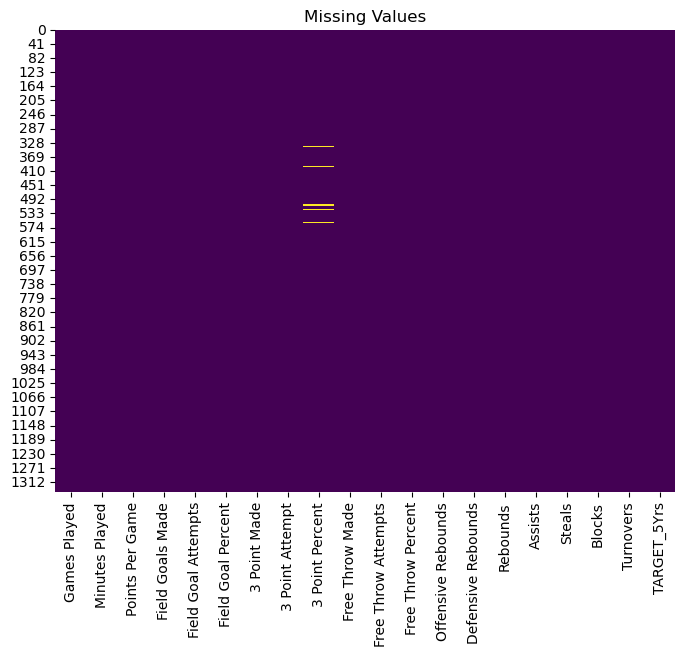

In [7]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

In [8]:
# remove missing value with entire row
data = df.dropna(how='any')

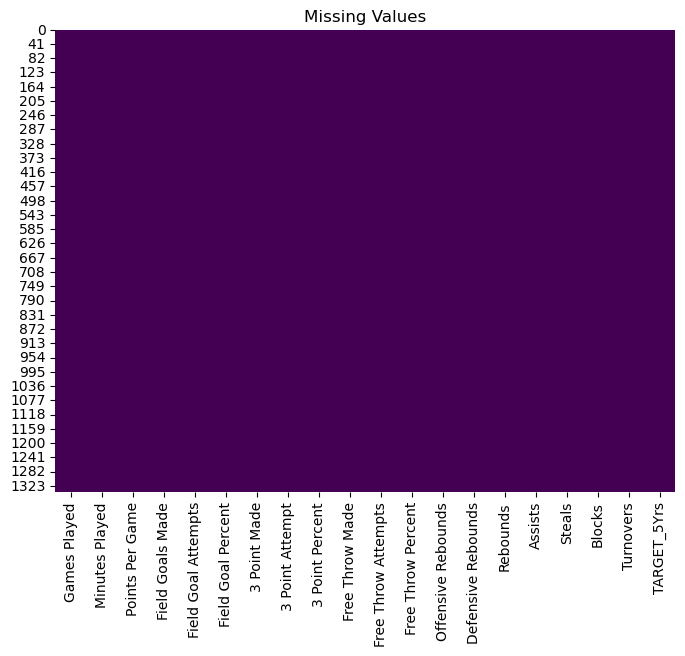

In [9]:
# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.show()

#### 2.4) Duplicate value handling

In [10]:
duplicate_rows = data[data.duplicated(keep='first')]
# first occurrence of the duplicate and marks the rest as duplicates.
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 11


There are 11 duplicate rowsa in the dataset and we have to remove them

In [11]:
# Remove duplicate rows from the DataFrame
data = data.drop_duplicates(keep='first')

In [12]:
# again check the duplicate rows

duplicate_rows = data[data.duplicated(keep='first')]
# first occurrence of the duplicate and marks the rest as duplicates.
num_duplicate_rows = len(duplicate_rows)

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 0


#### 2.5) Data distribution

* Density plots for all the variables

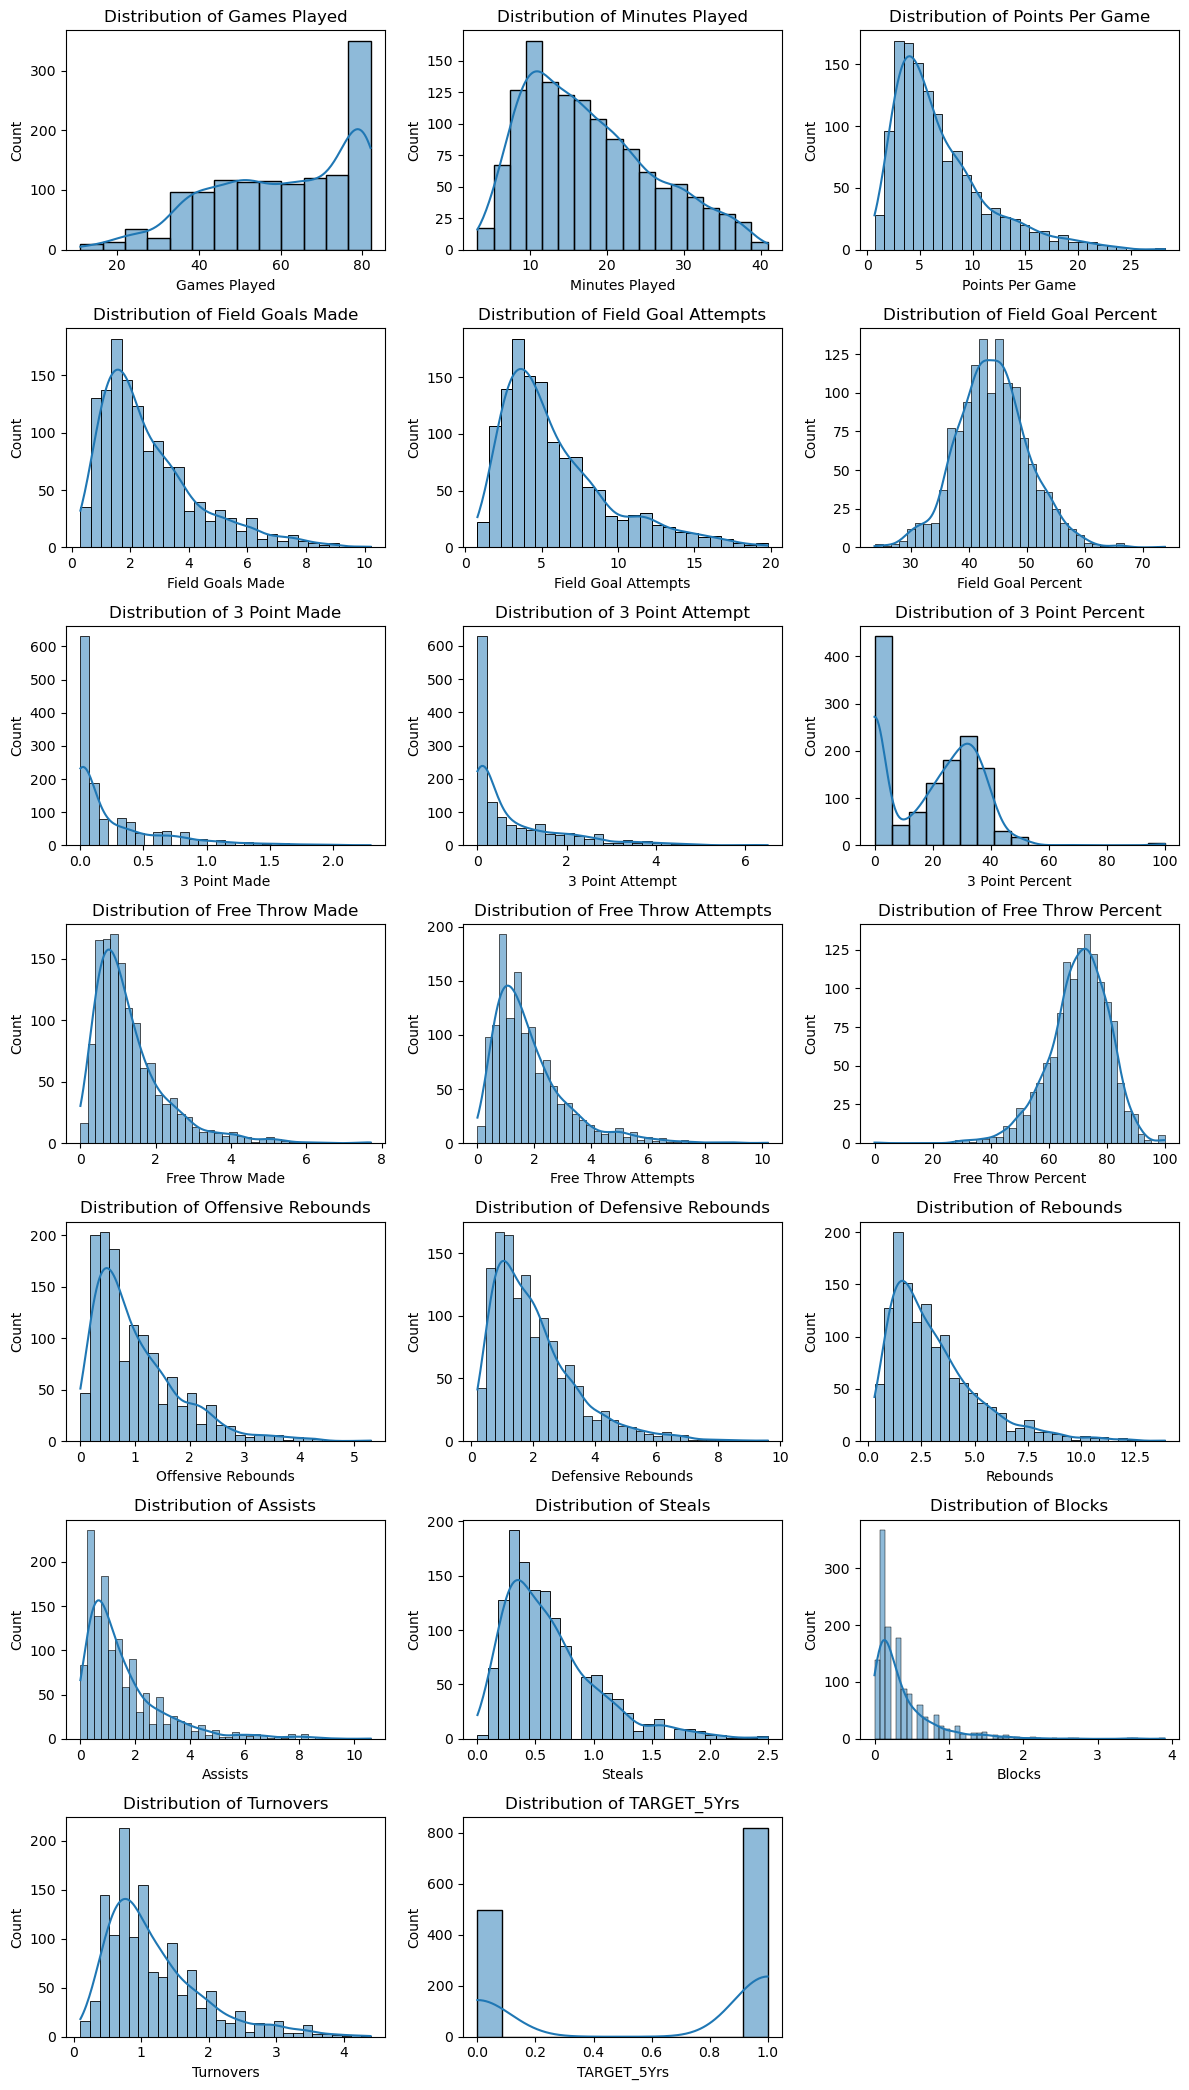

In [13]:
# Create subplots for each variable
plt.figure(figsize=(12, 21))  # Adjust the figure size as needed
for i, column in enumerate(data.columns):
    plt.subplot(7, 3, i + 1)  # Adjust the subplot layout as needed
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

#### 2.6) Outlier handling

* Outlier detection from boxplots

Games Played               Axes(0.125,0.77;0.168478x0.11)
Minutes Played          Axes(0.327174,0.77;0.168478x0.11)
Points Per Game         Axes(0.529348,0.77;0.168478x0.11)
Field Goals Made        Axes(0.731522,0.77;0.168478x0.11)
Field Goal Attempts       Axes(0.125,0.638;0.168478x0.11)
Field Goal Percent     Axes(0.327174,0.638;0.168478x0.11)
3 Point Made           Axes(0.529348,0.638;0.168478x0.11)
3 Point Attempt        Axes(0.731522,0.638;0.168478x0.11)
3 Point Percent           Axes(0.125,0.506;0.168478x0.11)
Free Throw Made        Axes(0.327174,0.506;0.168478x0.11)
Free Throw Attempts    Axes(0.529348,0.506;0.168478x0.11)
Free Throw Percent     Axes(0.731522,0.506;0.168478x0.11)
Offensive Rebounds        Axes(0.125,0.374;0.168478x0.11)
Defensive Rebounds     Axes(0.327174,0.374;0.168478x0.11)
Rebounds               Axes(0.529348,0.374;0.168478x0.11)
Assists                Axes(0.731522,0.374;0.168478x0.11)
Steals                    Axes(0.125,0.242;0.168478x0.11)
Blocks        

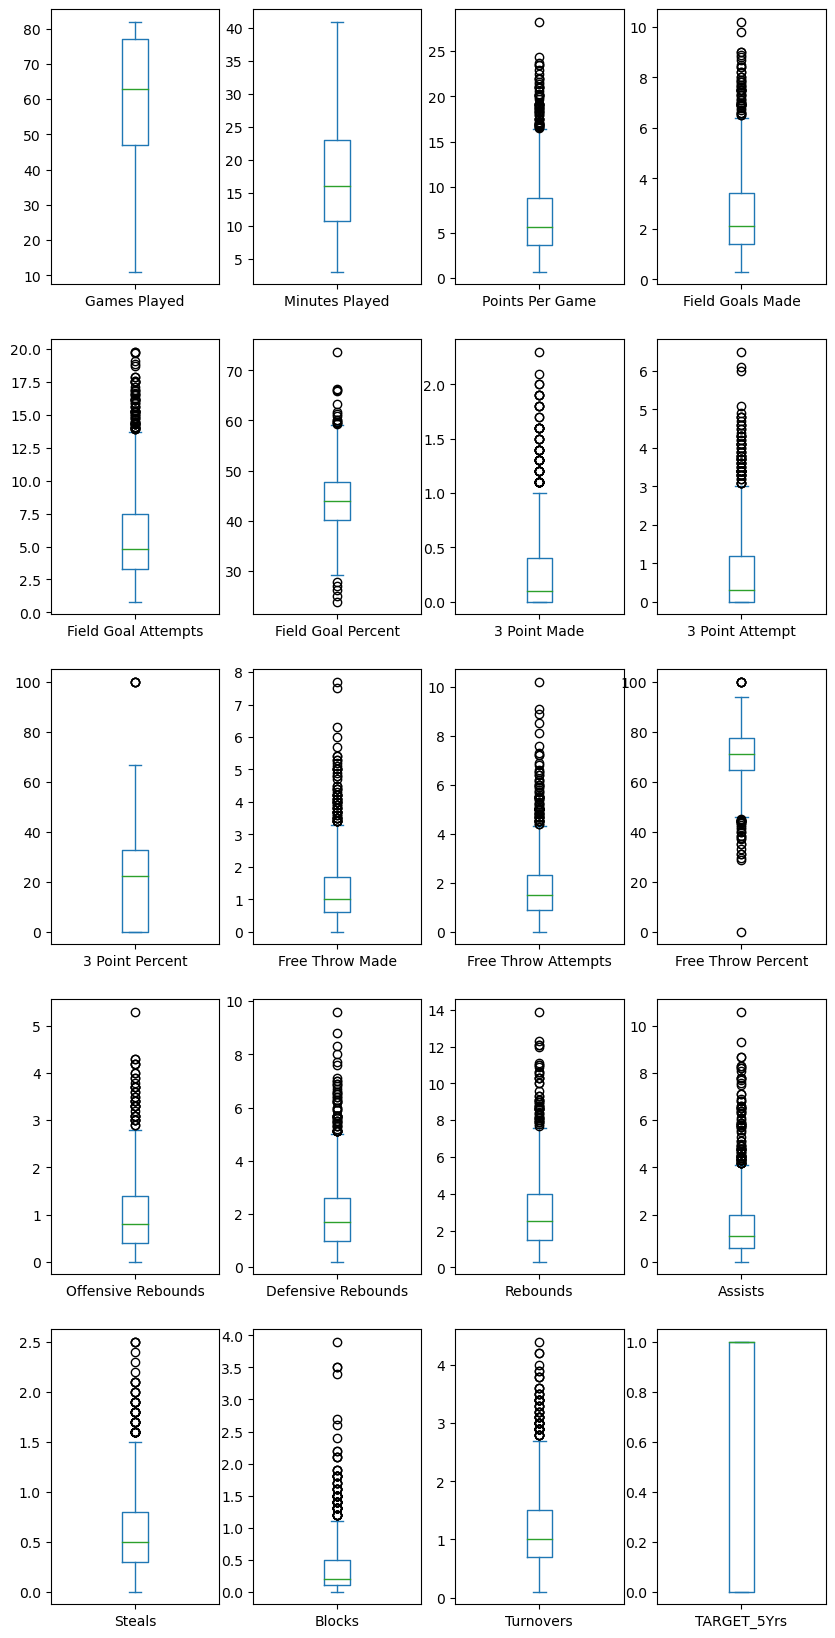

In [14]:
data.iloc[:,0:20].plot(kind="box", subplots=True, layout=(6,4), figsize=(10,25))

* Take the percentage of outliers for each variable

In [15]:
# Define a function to calculate the percentage of outliers
def percentage_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers) / len(series) * 100

# Calculate the percentage of outliers for each variable
outlier_percentages = data.apply(percentage_outliers)

# Display the result
print(outlier_percentages)


Games Played           0.000000
Minutes Played         0.000000
Points Per Game        0.151745
Field Goals Made       0.151745
Field Goal Attempts    0.000000
Field Goal Percent     0.075873
3 Point Made           1.062215
3 Point Attempt        0.379363
3 Point Percent        0.000000
Free Throw Made        0.834598
Free Throw Attempts    1.062215
Free Throw Percent     0.075873
Offensive Rebounds     0.075873
Defensive Rebounds     0.455235
Rebounds               0.379363
Assists                2.276176
Steals                 0.303490
Blocks                 1.669196
Turnovers              0.303490
TARGET_5Yrs            0.000000
dtype: float64


In [16]:
data_new = data

* replace the outliers using median value

In [ ]:
""""
def replace_outliers_with_median(data):
    for column in data.columns:
        # Calculate the IQR (Interquartile Range)
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the median value
        data[column] = data[column].apply(lambda x: data[column].median() if x < lower_bound or x > upper_bound else x)

    return data

# Example usage
# Replace outliers in your DataFrame (replace 'your_dataframe' with your actual DataFrame)
data_new = replace_outliers_with_median(data)


""""



* Removing Outliers

In [ ]:
""""
data_new = data.iloc[:,:]

def outliers_for_features(data, col):    
    Q1 = data.loc[:,col].quantile(0.25)
    Q3 = data.loc[:,col].quantile(0.75)
    
    upper_limit = Q3 + 1.5*(Q3-Q1)
    lower_limit = Q1 - 1.5*(Q3-Q1)
    
    return data_new[col].apply(lambda x : upper_limit if x > upper_limit else lower_limit if x < lower_limit else x)
    
for col in df.iloc[:,1:19]:
    data_new[col] = outliers_for_features(data, col)
    
""""

#### 2.7) Correlation analysis

* Correlation of each variable with response variable

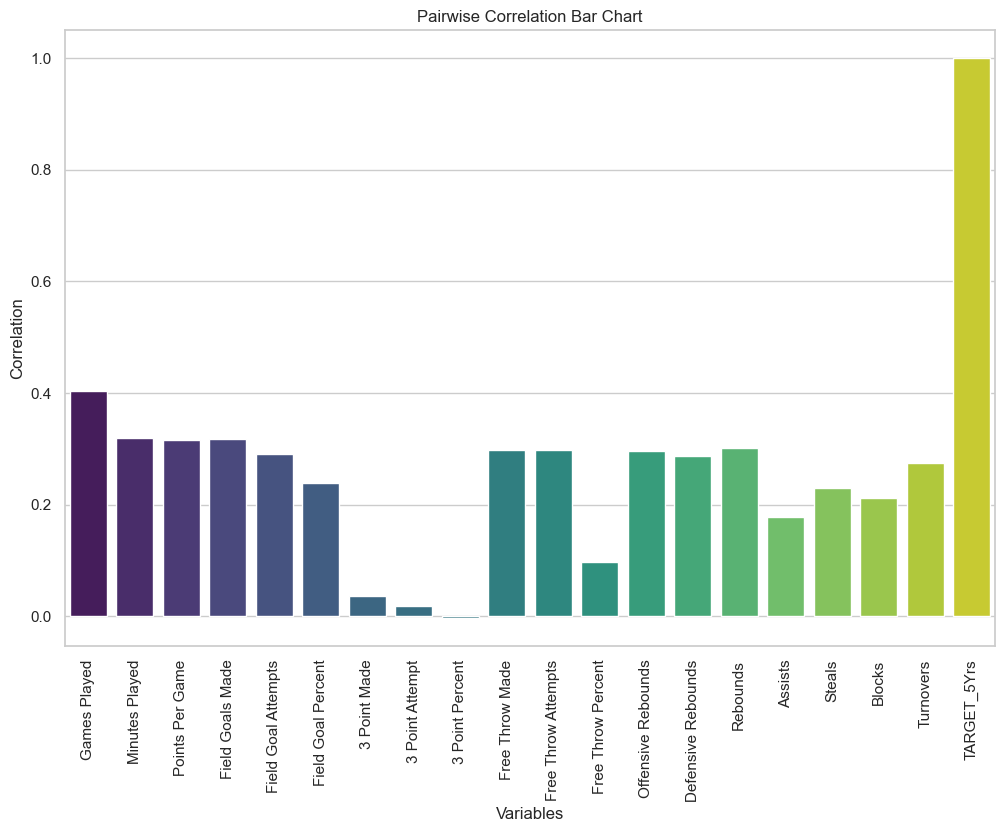

In [17]:
# Calculate the correlation matrix
corr_matrix = data_new.corr()

# Create a bar chart to display the correlations
plt.figure(figsize=(12, 8))  # Set the figure size
sns.set(style="whitegrid")  # Set the style of the chart

# Create a bar chart using a horizontal barplot
sns.barplot(x=corr_matrix.index, y=corr_matrix["TARGET_5Yrs"], palette="viridis")

# Customize the chart
plt.title("Pairwise Correlation Bar Chart")
plt.xlabel("Variables")
plt.ylabel("Correlation")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()

* pair plot to check how the correlation applies between each variable

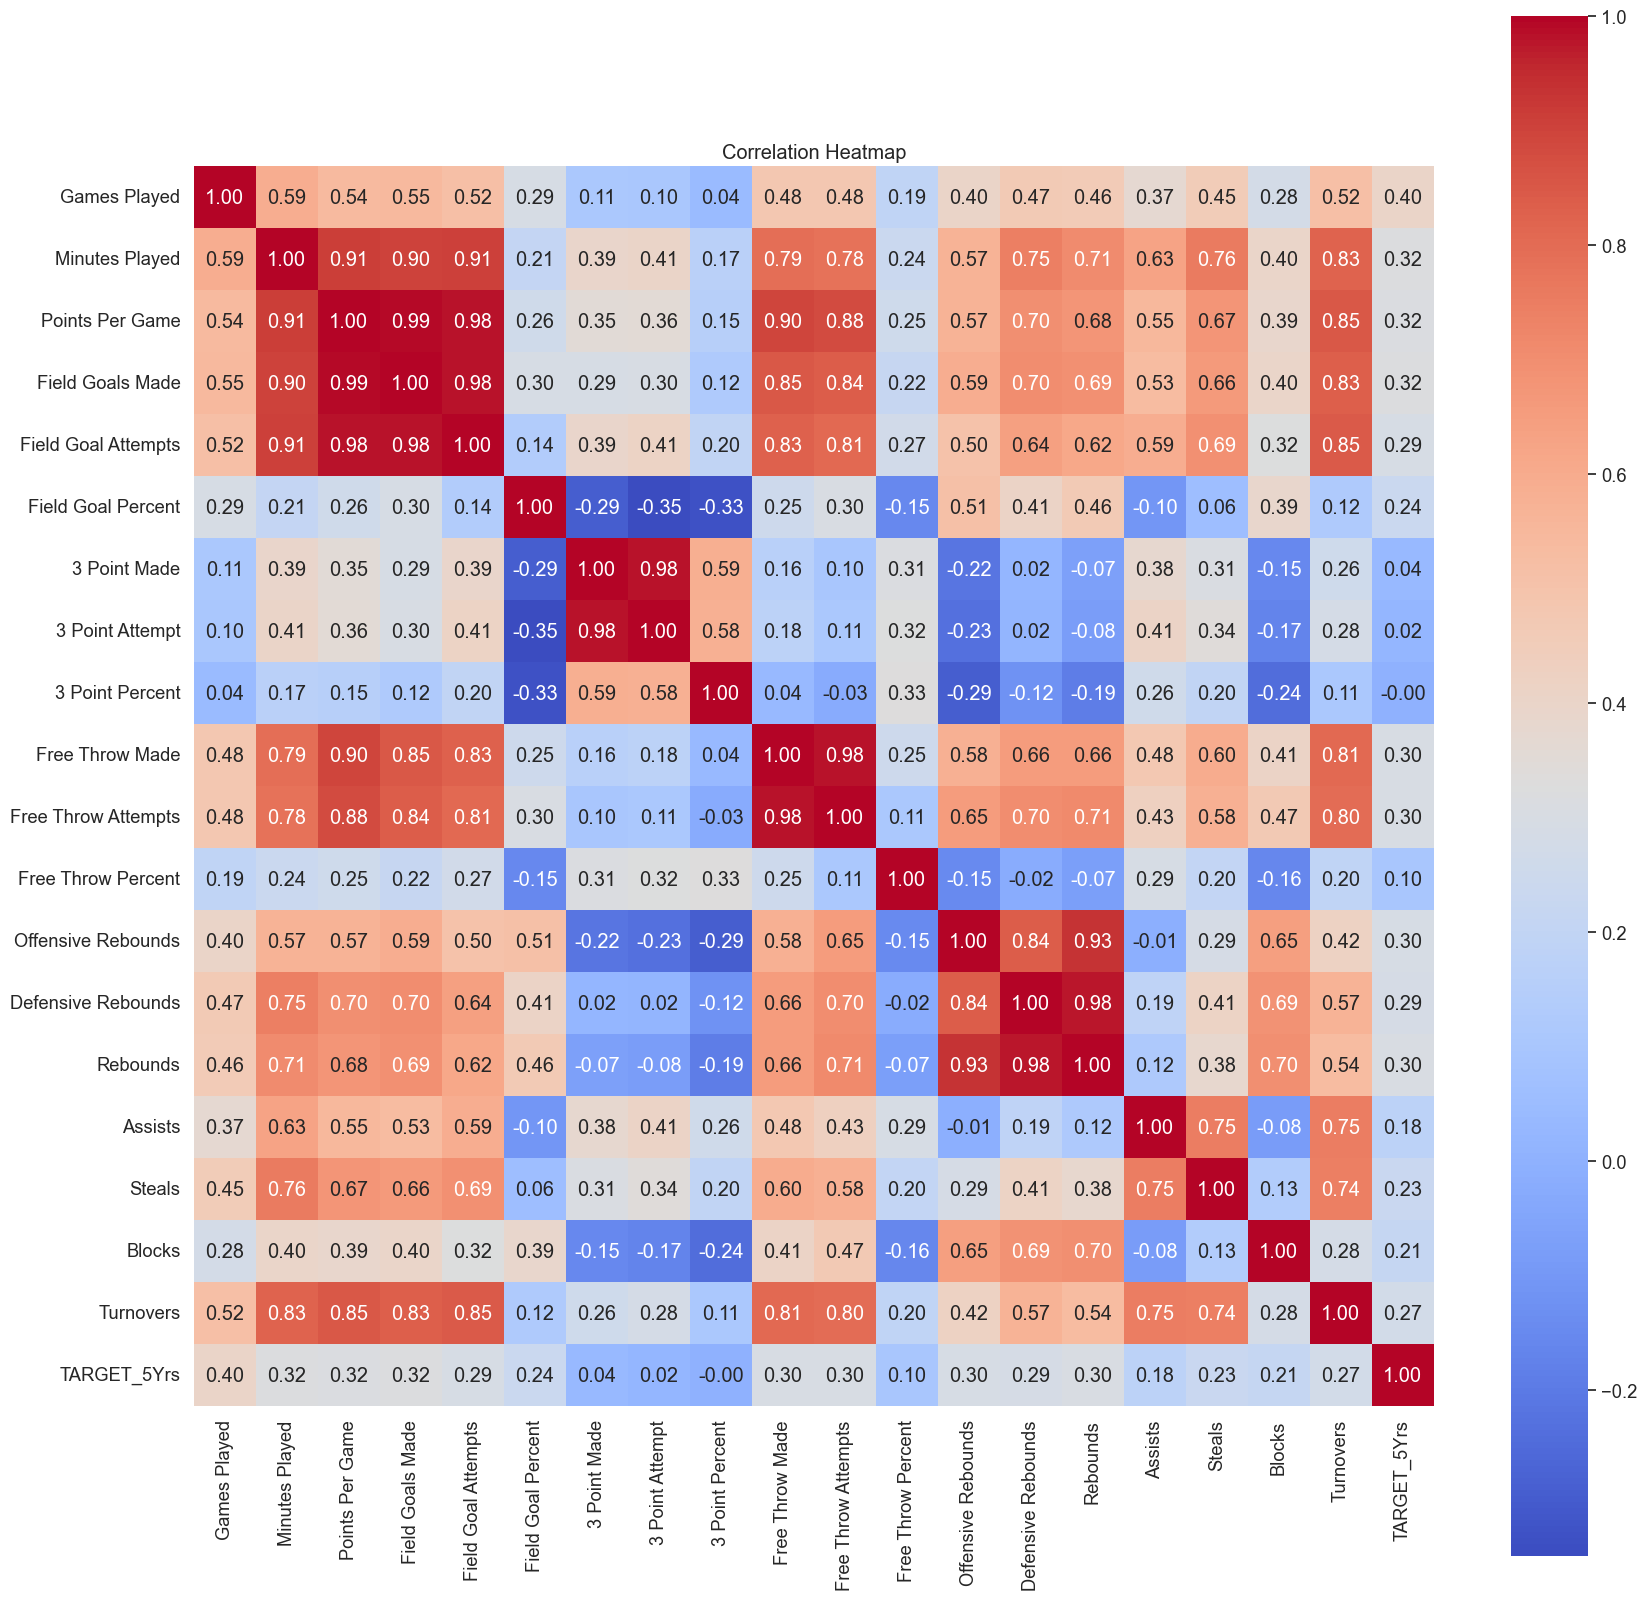

In [18]:
corr_matrix = data_new.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Customize the plot
plt.title("Correlation Heatmap")
plt.show()

#### 2.8) Class balancing

* Check the distribution of the response variable

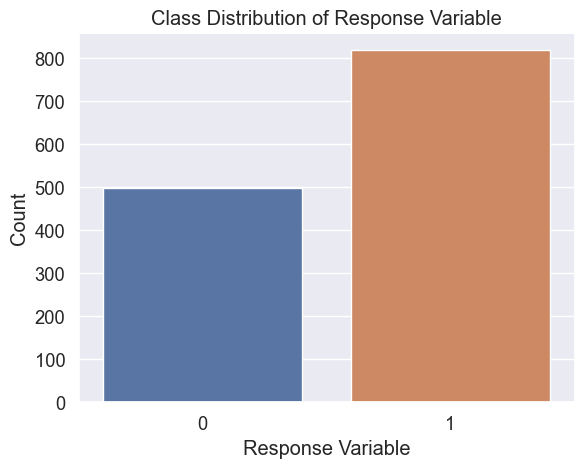

In [19]:
sns.countplot(x='TARGET_5Yrs', data=data_new)
plt.title('Class Distribution of Response Variable')
plt.xlabel('Response Variable')
plt.ylabel('Count')
plt.show()

Here, classes of the response varibale doesn't balance. We have to balance the response variable. 

* Balance response variable using SMOTE ( Syntetic Minority Oversampling Technique ) technique

In [20]:
X = data_new.drop('TARGET_5Yrs', axis=1)
y = data_new['TARGET_5Yrs']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [21]:
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

In [22]:
balanced_df.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


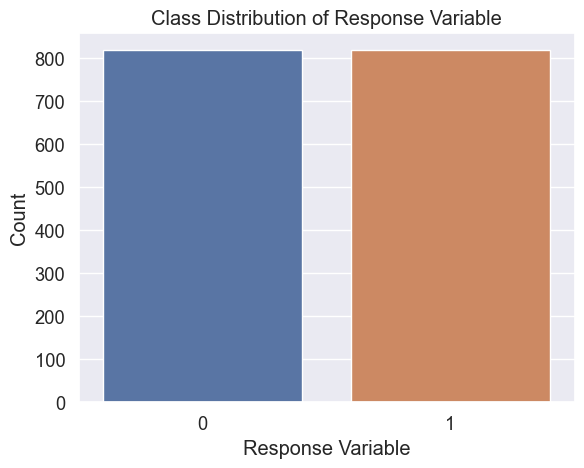

In [23]:
sns.countplot(x='TARGET_5Yrs', data=balanced_df)
plt.title('Class Distribution of Response Variable')
plt.xlabel('Response Variable')
plt.ylabel('Count')
plt.show()

#### 2.9) Feature scaling

* Standardizing

In [24]:
X_std = balanced_df.drop('TARGET_5Yrs', axis=1)
y = balanced_df['TARGET_5Yrs']

In [25]:
X_std.head()

,Games Played,Minutes Played,Points Per Game,Field Goals Made,Field Goal Attempts,Field Goal Percent,3 Point Made,3 Point Attempt,3 Point Percent,Free Throw Made,Free Throw Attempts,Free Throw Percent,Offensive Rebounds,Defensive Rebounds,Rebounds,Assists,Steals,Blocks,Turnovers
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8


In [26]:
# scale the dataset
X_std = StandardScaler().fit_transform(X_std)

In [27]:
pd.DataFrame(X_std).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.272925,1.299569,0.225837,0.066778,0.573708,-1.495240,0.691070,1.283739,0.384167,0.395486,0.457417,-0.023764,-0.334461,1.148664,0.635075,0.300695,-0.479816,0.141734,0.235284
1,-1.329521,1.237718,0.178267,-0.303436,0.313895,-2.330191,1.230043,1.961672,0.289261,1.453115,1.327370,0.596697,-0.605859,0.067678,-0.233957,1.580593,1.301458,0.390290,0.665105
2,0.877721,-0.197218,-0.297440,-0.303436,-0.263467,-0.267370,0.421583,0.896348,0.346204,-0.344854,-0.333449,-0.296391,-0.605859,-0.163962,-0.336195,-0.339255,-0.225348,-0.106821,-0.194536
3,-0.027814,-0.654913,-0.178513,-0.118329,-0.032522,-0.201884,-0.386877,-0.265823,0.232318,-0.344854,-0.333449,-0.117773,0.072636,-0.781669,-0.489554,-0.481466,0.029119,-0.603932,-0.194536
4,-0.593774,-0.667283,-0.463937,-0.550245,-0.754225,1.402533,-0.656364,-0.653213,-1.197592,0.078198,0.141071,-0.258787,0.072636,-0.318389,-0.182837,-0.836993,-0.734284,0.141734,-0.481084


* Normalization

In [28]:
X_nor = balanced_df.drop('TARGET_5Yrs', axis=1)
y = balanced_df['TARGET_5Yrs']

In [29]:
# scale the dataset
X_nor = MinMaxScaler().fit_transform(X_nor)

In [30]:
pd.DataFrame(X_nor).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.352113,0.642857,0.243636,0.232323,0.357895,0.218437,0.217391,0.323077,0.250,0.207792,0.225490,0.699,0.132075,0.340426,0.279412,0.179245,0.16,0.102564,0.279070
1,0.338028,0.629630,0.236364,0.171717,0.310526,0.116232,0.304348,0.430769,0.235,0.337662,0.333333,0.765,0.094340,0.191489,0.154412,0.349057,0.44,0.128205,0.348837
2,0.887324,0.322751,0.163636,0.171717,0.205263,0.368737,0.173913,0.261538,0.244,0.116883,0.127451,0.670,0.094340,0.159574,0.139706,0.094340,0.20,0.076923,0.209302
3,0.661972,0.224868,0.181818,0.202020,0.247368,0.376754,0.043478,0.076923,0.226,0.116883,0.127451,0.689,0.188679,0.074468,0.117647,0.075472,0.24,0.025641,0.209302
4,0.521127,0.222222,0.138182,0.131313,0.115789,0.573146,0.000000,0.015385,0.000,0.168831,0.186275,0.674,0.188679,0.138298,0.161765,0.028302,0.12,0.102564,0.162791


### 3) Modeling

#### 3.1) Modeling using standard scaling data

* Split the data

In [31]:
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std, y, test_size= 1/4, random_state=0)

#### 3.1.1) Logistic Regression Model

In [32]:
# create the model and fit
lr_std = LogisticRegression()
lr_std.fit(X_train_std, y_train_std)

LogisticRegression()

In [33]:
# predict the test data response variable
y_predicted_lr_std = lr_std.predict(X_test_std)

In [34]:
# predict the probability value of response variable
lr_std.predict_proba(X_test_std)

array([[0.17354627, 0.82645373],
       [0.78204867, 0.21795133],
       [0.15097429, 0.84902571],
       [0.57662535, 0.42337465],
       [0.61418314, 0.38581686],
       [0.49142427, 0.50857573],
       [0.36490324, 0.63509676],
       [0.19133438, 0.80866562],
       [0.82669327, 0.17330673],
       [0.18276978, 0.81723022],
       [0.51696877, 0.48303123],
       [0.70643688, 0.29356312],
       [0.62845708, 0.37154292],
       [0.15637702, 0.84362298],
       [0.13497067, 0.86502933],
       [0.04911704, 0.95088296],
       [0.43395506, 0.56604494],
       [0.15877636, 0.84122364],
       [0.15051211, 0.84948789],
       [0.32699888, 0.67300112],
       [0.5574564 , 0.4425436 ],
       [0.27633599, 0.72366401],
       [0.32597492, 0.67402508],
       [0.45895658, 0.54104342],
       [0.25947449, 0.74052551],
       [0.37124393, 0.62875607],
       [0.24809603, 0.75190397],
       [0.33439269, 0.66560731],
       [0.83372455, 0.16627545],
       [0.41990584, 0.58009416],
       [0.

* Evaluating the model

In [35]:
# output the accuracy score
print('Our Accuracy is %.2f' % lr_std.score(X_test_std, y_test_std))

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'% (X_test_std.shape[0], (y_test_std != lr_std.predict(X_test_std)).sum()))

Our Accuracy is 0.73
Number of mislabeled points out of a total 410 points : 112


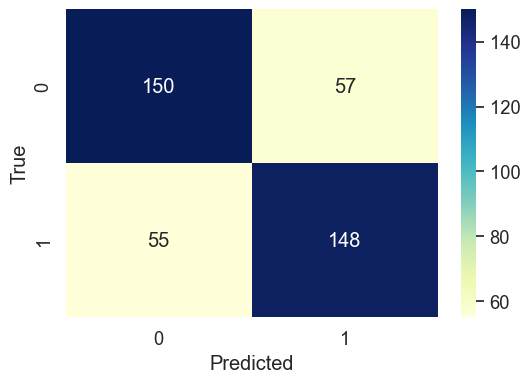

In [36]:
cm_lr_std = confusion_matrix(y_test_std,y_predicted_lr_std)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr_std, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

* 1: if career length >= 5 yrs 
* 0: if career length < 5 yrs

In [37]:
# confusion matrix
print(classification_report(y_test_std, y_predicted_lr_std))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       207
           1       0.72      0.73      0.73       203

    accuracy                           0.73       410
   macro avg       0.73      0.73      0.73       410
weighted avg       0.73      0.73      0.73       410



#### 3.1.2) Naive Bayes 

In [38]:
# create the model and fit
nb_std =  GaussianNB()
nb_std.fit(X_train_std, y_train_std)

GaussianNB()

In [39]:
# predict the test data response variable
y_predicted_nb_std = nb_std.predict(X_test_std)

In [40]:
# predict the probability value of response variable
nb_std.predict_proba(X_test_std)

array([[1.71988212e-08, 9.99999983e-01],
       [9.99929442e-01, 7.05583796e-05],
       [3.69861172e-20, 1.00000000e+00],
       [9.99731265e-01, 2.68734975e-04],
       [7.79516639e-01, 2.20483361e-01],
       [8.08644627e-06, 9.99991914e-01],
       [5.69397359e-01, 4.30602641e-01],
       [5.73892980e-07, 9.99999426e-01],
       [9.99970318e-01, 2.96818951e-05],
       [9.67406187e-02, 9.03259381e-01],
       [4.84750789e-06, 9.99995152e-01],
       [9.99786484e-01, 2.13515730e-04],
       [3.85686576e-06, 9.99996143e-01],
       [7.20609448e-01, 2.79390552e-01],
       [3.45046463e-21, 1.00000000e+00],
       [1.73224543e-26, 1.00000000e+00],
       [9.97036959e-01, 2.96304053e-03],
       [6.01657272e-10, 9.99999999e-01],
       [2.48586678e-15, 1.00000000e+00],
       [8.56471082e-01, 1.43528918e-01],
       [9.99782212e-01, 2.17788389e-04],
       [6.07457643e-01, 3.92542357e-01],
       [1.29030066e-01, 8.70969934e-01],
       [9.99144381e-01, 8.55618885e-04],
       [5.521218

* Evaluating the model

In [41]:
# output the accuracy score
print('Our Accuracy is %.2f' % nb_std.score(X_test_std, y_test_std))

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'% (X_test_std.shape[0], (y_test_std != nb_std.predict(X_test_std)).sum()))

Our Accuracy is 0.69
Number of mislabeled points out of a total 410 points : 128


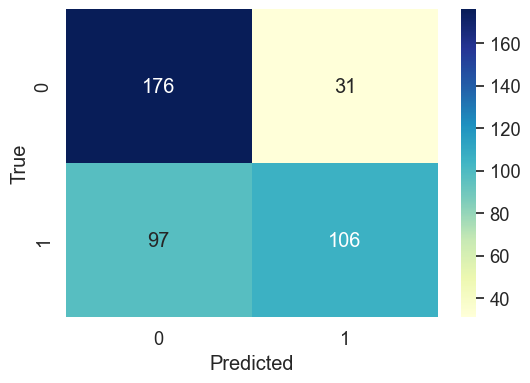

In [42]:
cm_nb_std = confusion_matrix(y_test_std,y_predicted_nb_std)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb_std, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [43]:
# confusion matrix
print(classification_report(y_test_std, y_predicted_nb_std))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       207
           1       0.77      0.52      0.62       203

    accuracy                           0.69       410
   macro avg       0.71      0.69      0.68       410
weighted avg       0.71      0.69      0.68       410



#### 3.1.3) Neural Network

In [44]:
# setup the neural network architecture
mlp_std = MLPClassifier(hidden_layer_sizes=(20,50,40), activation="relu" ,random_state=0, max_iter=2000)
mlp_std.fit(X_train_std, y_train_std)

MLPClassifier(hidden_layer_sizes=(20, 50, 40), max_iter=2000, random_state=0)

In [45]:
# predict the test data response variable
y_predicted_mlp_std = nb_std.predict(X_test_std)

In [46]:
# predict the probability value of response variable
mlp_std.predict_proba(X_test_std)

array([[1.20672315e-02, 9.87932768e-01],
       [7.95126259e-01, 2.04873741e-01],
       [1.74959061e-01, 8.25040939e-01],
       [9.41239152e-01, 5.87608483e-02],
       [9.91818173e-01, 8.18182711e-03],
       [9.97877692e-01, 2.12230842e-03],
       [2.00905769e-02, 9.79909423e-01],
       [1.09707246e-07, 9.99999890e-01],
       [9.98768832e-01, 1.23116811e-03],
       [2.55893299e-04, 9.99744107e-01],
       [9.77565560e-01, 2.24344404e-02],
       [9.90776103e-01, 9.22389707e-03],
       [9.99053538e-01, 9.46462274e-04],
       [2.22971952e-09, 9.99999998e-01],
       [7.56847186e-03, 9.92431528e-01],
       [3.23084328e-03, 9.96769157e-01],
       [5.24534858e-01, 4.75465142e-01],
       [3.08276435e-07, 9.99999692e-01],
       [2.08144215e-01, 7.91855785e-01],
       [3.06308372e-03, 9.96936916e-01],
       [3.23297580e-02, 9.67670242e-01],
       [2.73747015e-03, 9.97262530e-01],
       [8.93054427e-01, 1.06945573e-01],
       [1.80637013e-02, 9.81936299e-01],
       [5.400070

In [47]:
# performance metrics
print('Our Accuracy is %.2f' % mlp_std.score(X_test_std, y_test_std))
print('Number of mislabeled points out of a total %d points : %d'% (X_test_std.shape[0], (y_test_std != mlp_std.predict(X_test_std)).sum()))

Our Accuracy is 0.71
Number of mislabeled points out of a total 410 points : 119


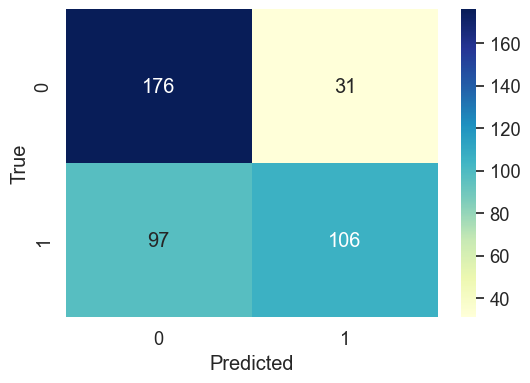

In [48]:
cm_mlp_std = confusion_matrix(y_test_std,y_predicted_mlp_std)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp_std, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [49]:
# confusion matrix
print(classification_report(y_test_std, y_predicted_mlp_std))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       207
           1       0.77      0.52      0.62       203

    accuracy                           0.69       410
   macro avg       0.71      0.69      0.68       410
weighted avg       0.71      0.69      0.68       410



#### 3.2) Modeling using minmax scaling data

* Split the dataset

In [50]:
X_train_nor, X_test_nor, y_train_nor, y_test_nor = train_test_split(X_nor, y, test_size= 1/4, random_state=0)

#### 3.2.1) Logistic Regression

In [51]:
# create the model and fit
lr_nor = LogisticRegression()
lr_nor.fit(X_train_nor, y_train_nor)

LogisticRegression()

In [52]:
# predict the test data response variable
y_predicted_lr_nor = lr_nor.predict(X_test_nor)

In [53]:
# predict the probability value of response variable
lr_nor.predict_proba(X_test_nor)

array([[0.21211382, 0.78788618],
       [0.75443628, 0.24556372],
       [0.28259511, 0.71740489],
       [0.62530748, 0.37469252],
       [0.67016227, 0.32983773],
       [0.49437634, 0.50562366],
       [0.33567901, 0.66432099],
       [0.23581095, 0.76418905],
       [0.77486083, 0.22513917],
       [0.25723841, 0.74276159],
       [0.42967887, 0.57032113],
       [0.68920789, 0.31079211],
       [0.59511588, 0.40488412],
       [0.24163876, 0.75836124],
       [0.11266743, 0.88733257],
       [0.08273875, 0.91726125],
       [0.47729917, 0.52270083],
       [0.2485567 , 0.7514433 ],
       [0.19621088, 0.80378912],
       [0.39996037, 0.60003963],
       [0.57035327, 0.42964673],
       [0.31380109, 0.68619891],
       [0.38529918, 0.61470082],
       [0.49308208, 0.50691792],
       [0.30697925, 0.69302075],
       [0.57252978, 0.42747022],
       [0.27909124, 0.72090876],
       [0.35695487, 0.64304513],
       [0.78598524, 0.21401476],
       [0.39000381, 0.60999619],
       [0.

* Evaluating the model

In [54]:
# output the accuracy score
print('Our Accuracy is %.2f' % lr_nor.score(X_test_nor, y_test_nor))

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'% (X_test_nor.shape[0], (y_test_nor != lr_nor.predict(X_test_nor)).sum()))

Our Accuracy is 0.72
Number of mislabeled points out of a total 410 points : 115


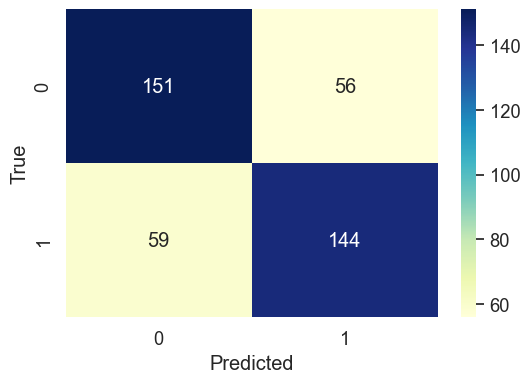

In [55]:
cm_lr_nor = confusion_matrix(y_test_nor,y_predicted_lr_nor)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr_nor, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [56]:
# confusion matrix
print(classification_report(y_test_nor, y_predicted_lr_nor))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       207
           1       0.72      0.71      0.71       203

    accuracy                           0.72       410
   macro avg       0.72      0.72      0.72       410
weighted avg       0.72      0.72      0.72       410



#### 3.2.2) Naive Bayes

In [57]:
# create the model and fit
nb_nor =  GaussianNB()
nb_nor.fit(X_train_nor, y_train_nor)

GaussianNB()

In [58]:
# predict the test data response variable
y_predicted_nb_nor = nb_nor.predict(X_test_nor)

In [59]:
# predict the probability value of response variable
nb_nor.predict_proba(X_test_nor)

array([[1.71988246e-08, 9.99999983e-01],
       [9.99929442e-01, 7.05583805e-05],
       [3.69861244e-20, 1.00000000e+00],
       [9.99731265e-01, 2.68734978e-04],
       [7.79516639e-01, 2.20483361e-01],
       [8.08644670e-06, 9.99991914e-01],
       [5.69397358e-01, 4.30602642e-01],
       [5.73893027e-07, 9.99999426e-01],
       [9.99970318e-01, 2.96818955e-05],
       [9.67406205e-02, 9.03259379e-01],
       [4.84750807e-06, 9.99995152e-01],
       [9.99786484e-01, 2.13515732e-04],
       [3.85686594e-06, 9.99996143e-01],
       [7.20609451e-01, 2.79390549e-01],
       [3.45046539e-21, 1.00000000e+00],
       [1.73224618e-26, 1.00000000e+00],
       [9.97036959e-01, 2.96304056e-03],
       [6.01657324e-10, 9.99999999e-01],
       [2.48586711e-15, 1.00000000e+00],
       [8.56471083e-01, 1.43528917e-01],
       [9.99782212e-01, 2.17788392e-04],
       [6.07457647e-01, 3.92542353e-01],
       [1.29030068e-01, 8.70969932e-01],
       [9.99144381e-01, 8.55618899e-04],
       [5.521219

* Evaluating the model

In [60]:
# output the accuracy score
print('Our Accuracy is %.2f' % nb_nor.score(X_test_nor, y_test_nor))

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'% (X_test_nor.shape[0], (y_test_nor != nb_nor.predict(X_test_nor)).sum()))

Our Accuracy is 0.69
Number of mislabeled points out of a total 410 points : 128


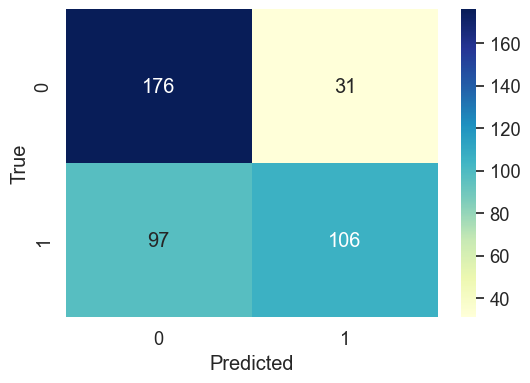

In [61]:
cm_nb_nor = confusion_matrix(y_test_nor,y_predicted_nb_nor)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb_nor, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [62]:
# confusion matrix
print(classification_report(y_test_nor, y_predicted_nb_nor))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       207
           1       0.77      0.52      0.62       203

    accuracy                           0.69       410
   macro avg       0.71      0.69      0.68       410
weighted avg       0.71      0.69      0.68       410



#### 3.2.3) Neural Network

In [63]:
# setup the neural network architecture
mlp_nor = MLPClassifier(hidden_layer_sizes=(20,50,40), activation="relu" ,random_state=0, max_iter=2000)
mlp_nor.fit(X_train_nor, y_train_nor)

MLPClassifier(hidden_layer_sizes=(20, 50, 40), max_iter=2000, random_state=0)

In [64]:
# predict the test data response variable
y_predicted_mlp_nor = mlp_nor.predict(X_test_nor)

In [65]:
# predict the probability value of response variable
mlp_nor.predict_proba(X_test_nor)

array([[5.97871356e-02, 9.40212864e-01],
       [8.44038962e-01, 1.55961038e-01],
       [1.13764910e-01, 8.86235090e-01],
       [5.41321791e-01, 4.58678209e-01],
       [7.25480873e-01, 2.74519127e-01],
       [3.96608473e-01, 6.03391527e-01],
       [3.95446519e-01, 6.04553481e-01],
       [5.31725022e-03, 9.94682750e-01],
       [8.29324202e-01, 1.70675798e-01],
       [8.12367556e-02, 9.18763244e-01],
       [2.81955583e-01, 7.18044417e-01],
       [6.14463483e-01, 3.85536517e-01],
       [6.74216128e-01, 3.25783872e-01],
       [1.40176923e-02, 9.85982308e-01],
       [3.62719571e-04, 9.99637280e-01],
       [1.07199365e-01, 8.92800635e-01],
       [4.05242383e-01, 5.94757617e-01],
       [9.86649493e-02, 9.01335051e-01],
       [1.70732734e-02, 9.82926727e-01],
       [2.65384482e-01, 7.34615518e-01],
       [3.90520748e-01, 6.09479252e-01],
       [1.60625686e-01, 8.39374314e-01],
       [2.24888145e-01, 7.75111855e-01],
       [5.08126171e-01, 4.91873829e-01],
       [1.001413

* Evaluating the model

In [66]:
# performance metrics
print('Our Accuracy is %.2f' % mlp_nor.score(X_test_nor, y_test_nor))
print('Number of mislabeled points out of a total %d points : %d'% (X_test_nor.shape[0], (y_test_nor != mlp_nor.predict(X_test_nor)).sum()))

Our Accuracy is 0.72
Number of mislabeled points out of a total 410 points : 115


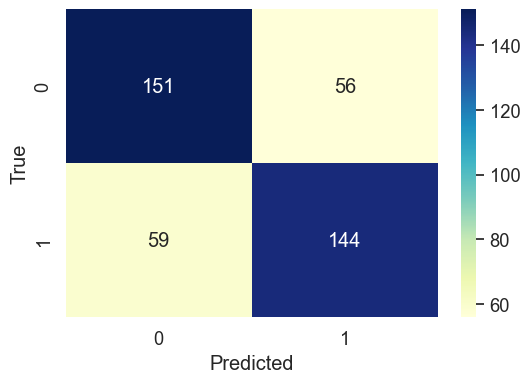

In [67]:
cm_mlp_nor = confusion_matrix(y_test_nor,y_predicted_mlp_nor)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp_nor, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [68]:
# confusion matrix
print(classification_report(y_test_nor, y_predicted_mlp_nor))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72       207
           1       0.72      0.71      0.71       203

    accuracy                           0.72       410
   macro avg       0.72      0.72      0.72       410
weighted avg       0.72      0.72      0.72       410



#### 3.3) Modeling using unscaled data

In [69]:
X = balanced_df.drop('TARGET_5Yrs', axis=1)
y = balanced_df['TARGET_5Yrs']

* Split the dataset

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 1/4, random_state=0)

#### 3.3.1) Logisitc Regression

In [71]:
# create the model and fit
lr = LogisticRegression()
lr.fit(X_train, y_train)

D:\Programmes\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
# predict the test data response variable
y_predicted_lr = lr.predict(X_test)

In [73]:
# predict the probability value of response variable
lr.predict_proba(X_test)

array([[0.21202932, 0.78797068],
       [0.77099172, 0.22900828],
       [0.21532552, 0.78467448],
       [0.53516492, 0.46483508],
       [0.64718342, 0.35281658],
       [0.44828421, 0.55171579],
       [0.34030902, 0.65969098],
       [0.18951737, 0.81048263],
       [0.74706467, 0.25293533],
       [0.2111341 , 0.7888659 ],
       [0.48309788, 0.51690212],
       [0.68932798, 0.31067202],
       [0.75963583, 0.24036417],
       [0.19799786, 0.80200214],
       [0.06441387, 0.93558613],
       [0.04514657, 0.95485343],
       [0.49148585, 0.50851415],
       [0.18475596, 0.81524404],
       [0.09533035, 0.90466965],
       [0.39134817, 0.60865183],
       [0.58559755, 0.41440245],
       [0.28643686, 0.71356314],
       [0.32590305, 0.67409695],
       [0.47648087, 0.52351913],
       [0.21230453, 0.78769547],
       [0.44340508, 0.55659492],
       [0.26423738, 0.73576262],
       [0.38553404, 0.61446596],
       [0.75052658, 0.24947342],
       [0.47239091, 0.52760909],
       [0.

* Evaluating the model

In [74]:
# output the accuracy score
print('Our Accuracy is %.2f' % lr.score(X_test, y_test))

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'% (X_test.shape[0], (y_test != lr.predict(X_test)).sum()))

Our Accuracy is 0.72
Number of mislabeled points out of a total 410 points : 114


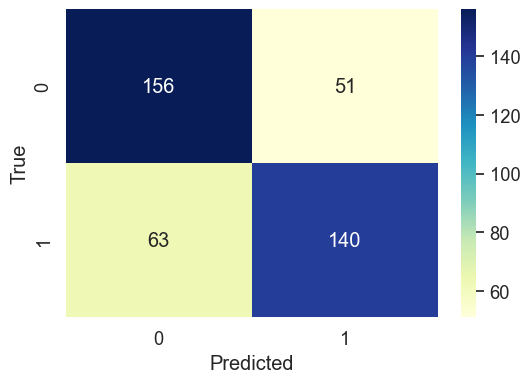

In [75]:
cm = confusion_matrix(y_test,y_predicted_lr)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [76]:
# confusion matrix
print(classification_report(y_test, y_predicted_lr))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       207
           1       0.73      0.69      0.71       203

    accuracy                           0.72       410
   macro avg       0.72      0.72      0.72       410
weighted avg       0.72      0.72      0.72       410



#### 3.3.2) Naive Bayes 

In [77]:
# create the model and fit
nb =  GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [78]:
# predict the test data response variable
y_predicted_nb = nb.predict(X_test)

In [79]:
# predict the probability value of response variable
nb.predict_proba(X_test)

array([[1.72001104e-08, 9.99999983e-01],
       [9.99929441e-01, 7.05586178e-05],
       [3.69875089e-20, 1.00000000e+00],
       [9.99731264e-01, 2.68735862e-04],
       [7.79517517e-01, 2.20482483e-01],
       [8.08659631e-06, 9.99991913e-01],
       [5.69397109e-01, 4.30602891e-01],
       [5.73901630e-07, 9.99999426e-01],
       [9.99970318e-01, 2.96819815e-05],
       [9.67409684e-02, 9.03259032e-01],
       [4.84754539e-06, 9.99995152e-01],
       [9.99786484e-01, 2.13516174e-04],
       [3.85691415e-06, 9.99996143e-01],
       [7.20609964e-01, 2.79390036e-01],
       [3.45055493e-21, 1.00000000e+00],
       [1.73244120e-26, 1.00000000e+00],
       [9.97036950e-01, 2.96304987e-03],
       [6.01670566e-10, 9.99999999e-01],
       [2.48594512e-15, 1.00000000e+00],
       [8.56471424e-01, 1.43528576e-01],
       [9.99782211e-01, 2.17789112e-04],
       [6.07458737e-01, 3.92541263e-01],
       [1.29031670e-01, 8.70968330e-01],
       [9.99144378e-01, 8.55621865e-04],
       [5.521299

* Evaluating the model

In [80]:
# output the accuracy score
print('Our Accuracy is %.2f' % nb.score(X_test, y_test))

# output the number of mislabeled points
print('Number of mislabeled points out of a total %d points : %d'% (X_test.shape[0], (y_test != nb.predict(X_test)).sum()))

Our Accuracy is 0.69
Number of mislabeled points out of a total 410 points : 128


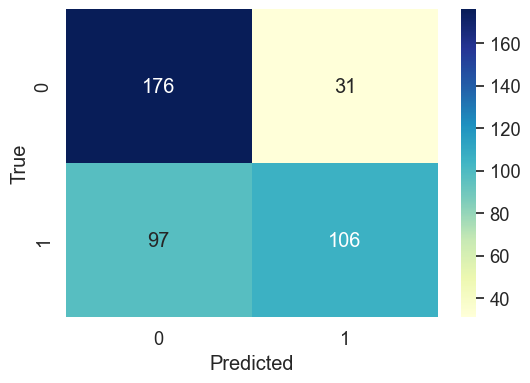

In [81]:
cm_nb = confusion_matrix(y_test,y_predicted_nb)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [82]:
# confusion matrix
print(classification_report(y_test, y_predicted_nb))

              precision    recall  f1-score   support

           0       0.64      0.85      0.73       207
           1       0.77      0.52      0.62       203

    accuracy                           0.69       410
   macro avg       0.71      0.69      0.68       410
weighted avg       0.71      0.69      0.68       410



#### 3.3.3) Neural Network

In [83]:
# setup the neural network architecture
mlp = MLPClassifier(hidden_layer_sizes=(20,50,40), activation="relu" ,random_state=0, max_iter=2000)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 50, 40), max_iter=2000, random_state=0)

In [84]:
# predict the test data response variable
y_predicted_mlp = mlp.predict(X_test)

In [85]:
# predict the probability value of response variable
mlp.predict_proba(X_test)

array([[0.28929157, 0.71070843],
       [0.7456233 , 0.2543767 ],
       [0.18289167, 0.81710833],
       [0.70637379, 0.29362621],
       [0.86917729, 0.13082271],
       [0.68471212, 0.31528788],
       [0.62646211, 0.37353789],
       [0.16688578, 0.83311422],
       [0.83400368, 0.16599632],
       [0.27660516, 0.72339484],
       [0.60666631, 0.39333369],
       [0.72964932, 0.27035068],
       [0.71105814, 0.28894186],
       [0.14206084, 0.85793916],
       [0.14346874, 0.85653126],
       [0.11369391, 0.88630609],
       [0.75086227, 0.24913773],
       [0.2186115 , 0.7813885 ],
       [0.1909635 , 0.8090365 ],
       [0.48813938, 0.51186062],
       [0.38799595, 0.61200405],
       [0.37686095, 0.62313905],
       [0.6091197 , 0.3908803 ],
       [0.60948169, 0.39051831],
       [0.3195687 , 0.6804313 ],
       [0.78113158, 0.21886842],
       [0.36959057, 0.63040943],
       [0.54629328, 0.45370672],
       [0.6988296 , 0.3011704 ],
       [0.39127521, 0.60872479],
       [0.

In [86]:
# performance metrics
print('Our Accuracy is %.2f' % mlp.score(X_test, y_test))
print('Number of mislabeled points out of a total %d points : %d'% (X_test.shape[0], (y_test != mlp.predict(X_test)).sum()))

Our Accuracy is 0.72
Number of mislabeled points out of a total 410 points : 115


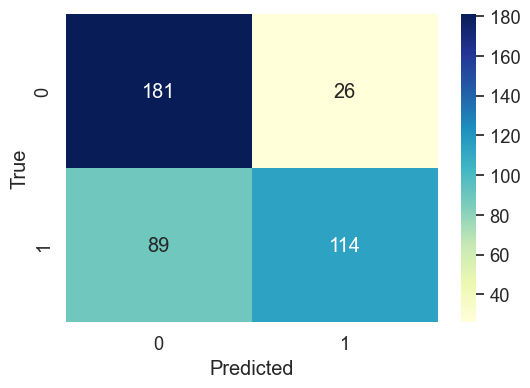

In [87]:
cm_mlp = confusion_matrix(y_test,y_predicted_mlp)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [88]:
# confusion matrix
print(classification_report(y_test, y_predicted_mlp))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       207
           1       0.81      0.56      0.66       203

    accuracy                           0.72       410
   macro avg       0.74      0.72      0.71       410
weighted avg       0.74      0.72      0.71       410

